# Estimating $f$-DP Curve for the Gaussian Mechanism using the PTLR Estimator

## Description

This notebook demonstrates how to use the PTLR estimator API to estimate the entire $f$-DP curve for the Gaussian Mechanism.

### Step 1: Import Packages

In [1]:
import numpy as np
import os
import sys
import time
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
fig_dir = os.path.join(project_dir, 'fig')
os.makedirs(fig_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)

from analysis.tradeoff_Gaussian import Gaussian_curve

from mech.GaussianDist import *

### Step 2: Instantiate the $f$-DP estimator for Gaussian Mechanism

In [2]:
kwargs = generate_params(num_samples = 100000, h=0.1)
estimator = GaussianPTLREstimator(kwargs)

### Step 3: Do the Estimation

In [3]:
output = estimator.build(eta_max = 15)

In [4]:
# Extract alpha and beta for plotting
alpha = output["alpha"]
beta = output["beta"]

### Step 4: Plot the $f$-curve

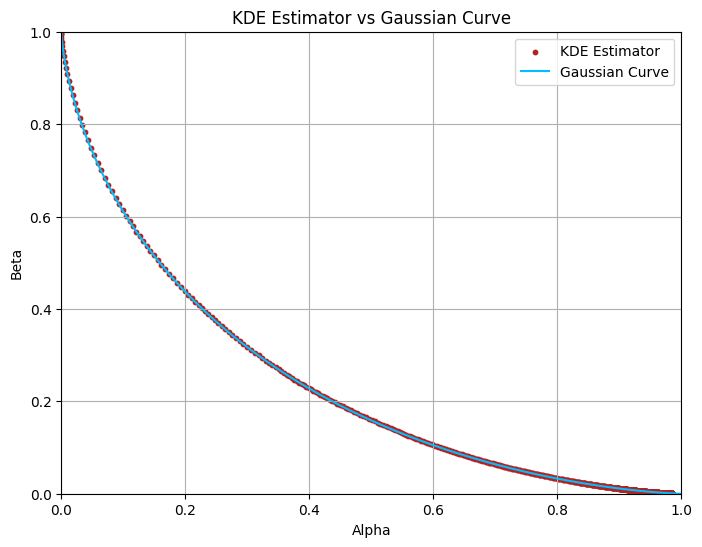

In [5]:
file_name = os.path.join(fig_dir, 'tradeoff_Gaussian_105_ptlr.png')
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(alpha, beta, color="firebrick", s=10, label="KDE Estimator")
alpha_values = np.linspace(0, 1, 1000)
plt.plot(alpha_values, Gaussian_curve(alpha_values), color="deepskyblue", linewidth=1.5, label="Gaussian Curve")
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.title("KDE Estimator vs Gaussian Curve")
plt.legend()
plt.grid()

# Save the plot
plt.savefig(file_name, bbox_inches = 'tight', dpi = 300);
plt.show()